## Univariate and Multivariate series

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
macrodata_df = sm.datasets.macrodata.load_pandas().data

In [3]:
macrodata_df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Series using Yahoo Finance

In [4]:
# %pip install yfinance

In [5]:
import yfinance as yf

In [6]:
# Tickers = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'EUROUSD=X']
ticker = 'PETR4.SA'
df = yf.download(
    ticker,
    start = '2010-01-01',
    end = '2023-01-01',
)

/tmp/ipykernel_39992/2769434103.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2010-01-04,9.039498,9.039498,8.918390,8.949879,13303600
2010-01-05,8.961991,9.066144,8.913548,9.054034,21396400
2010-01-06,9.083098,9.083098,8.913547,8.913547,18720600
2010-01-07,8.998322,9.070987,8.978945,9.027388,10964600
2010-01-08,8.949882,9.056456,8.928082,9.000747,14624200


## Synthetic

In [8]:
from sklearn.datasets import make_regression

In [9]:

X, y = make_regression(
    n_samples = 100,
    n_features = 10,
    n_informative = 5,
    random_state = 42
)

## Exercise
### Univariate:
- Cancer
- CO2
- Engel
- Nile
- Strikes
- Sunspots

In [2]:
import statsmodels.api as sm

In [62]:
# Univariate datasets
CANCER_DF   = sm.datasets  .cancer.load_pandas().data
CO2_DF      = sm.datasets     .co2.load_pandas().data
ENGEL_DF    = sm.datasets   .engel.load_pandas().data
NILE_DF     = sm.datasets    .nile.load_pandas().data
STRIKES_DF  = sm.datasets .strikes.load_pandas().data
SUNSPOTS_DF = sm.datasets.sunspots.load_pandas().data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf

def summarize(timeseries: pd.Series):
    '''
    Print Statistics and display plots for a given time series.
    '''
    
    # Convert to pandas Series if it's not already
    if not isinstance(timeseries, pd.Series):
        timeseries = pd.Series(timeseries)
    
    # 1. Mean and Median
    mean_val = timeseries.mean()
    median_val = timeseries.median()
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    
    # 2. Min and Max
    min_val = timeseries.min()
    max_val = timeseries.max()
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    
    # 3. Autocorrelation (lag=6, lag=12)
    acf_values_6 = acf(timeseries, nlags=6)[1:]  # Skipping the zero lag
    acf_values_12 = acf(timeseries, nlags=12)[1:]  # Skipping the zero lag
    print(f"Autocorrelation (lag=6): {acf_values_6}")
    print(f"Autocorrelation (lag=12): {acf_values_12}")
    
    # 4. Line Plot with Mean
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Time Series')
    plt.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val}')
    plt.title('Time Series with Mean')
    plt.legend()
    plt.show()

    # 5. Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(timeseries, kde=True, bins=30)
    plt.title('Histogram of Time Series')
    plt.show()

    # 6. Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=timeseries)
    plt.title('Boxplot of Time Series')
    plt.show()


#### 1/6 Cancer

In [22]:
CANCER_DF.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


In [16]:
cancer_ts = CANCER_DF['cancer']
cancer_ts

0        1.0
1        0.0
2        3.0
3        4.0
4        3.0
       ...  
296    250.0
297    267.0
298    244.0
299    248.0
300    360.0
Name: cancer, Length: 301, dtype: float64

Mean: 39.857142857142854
Median: 22.0
Min: 0.0
Max: 360.0
Autocorrelation (lag=6): [0.87104993 0.84081983 0.80274891 0.76302665 0.71504213 0.68934261]
Autocorrelation (lag=12): [0.87104993 0.84081983 0.80274891 0.76302665 0.71504213 0.68934261
 0.65807501 0.58829179 0.56814204 0.54262119 0.5381241  0.49541596]


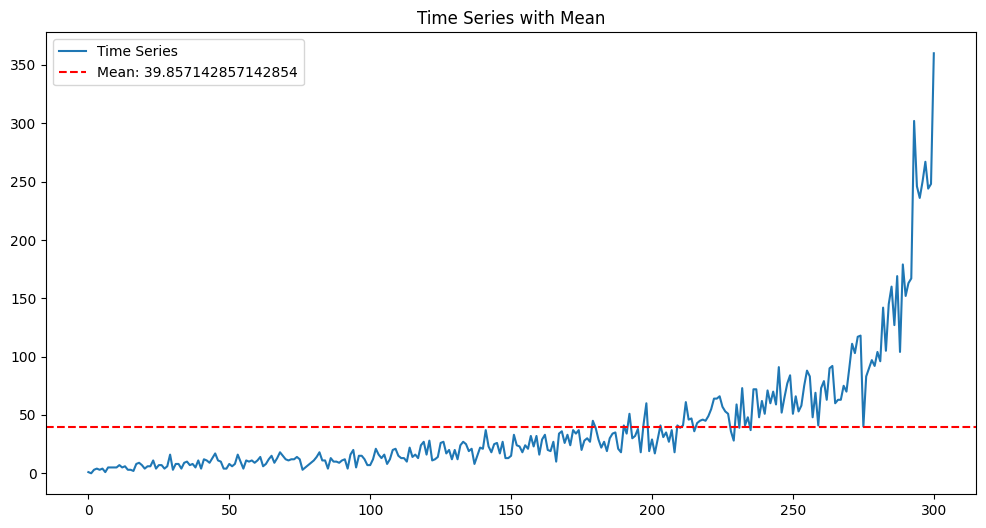

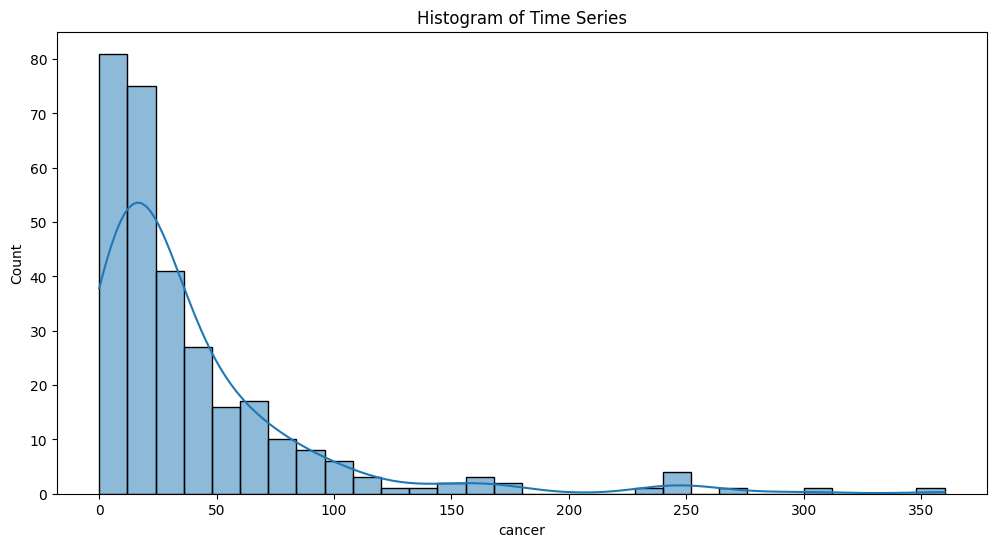

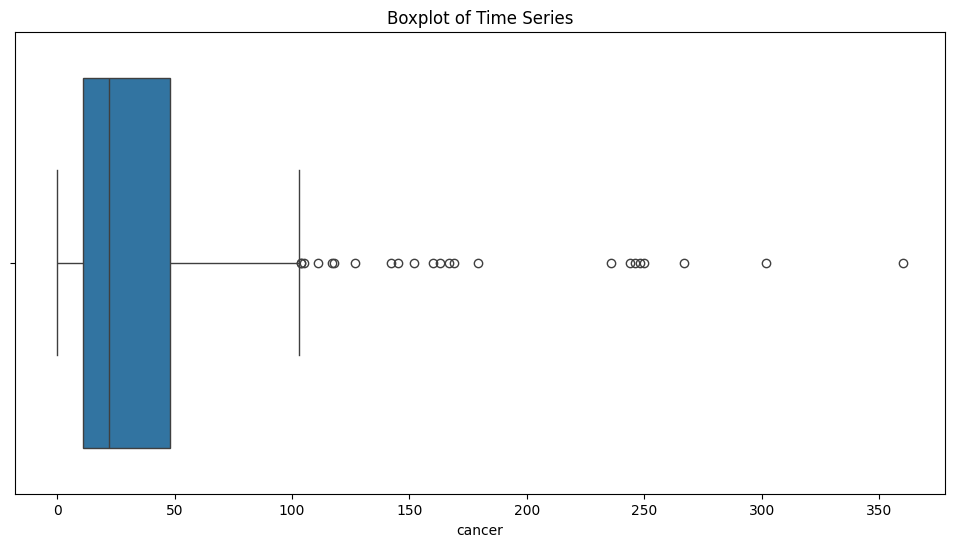

In [19]:
summarize(cancer_ts)

#### 2/6 CO2

In [23]:
CO2_DF.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [36]:
co2_ts = CO2_DF['co2']

In [37]:
co2_ts

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64

##### Drop nulls

In [38]:
co2_ts = co2_ts.dropna()

In [39]:
co2_ts

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Name: co2, Length: 2225, dtype: float64

##### Summarize

Mean: 340.1422471910112
Median: 338.3
Min: 313.0
Max: 373.9
Autocorrelation (lag=6): [0.99834844 0.99667427 0.99486613 0.9928028  0.99053283 0.98808437]
Autocorrelation (lag=12): [0.99834844 0.99667427 0.99486613 0.9928028  0.99053283 0.98808437
 0.98556195 0.98296466 0.98021286 0.97740946 0.97459315 0.97182281]


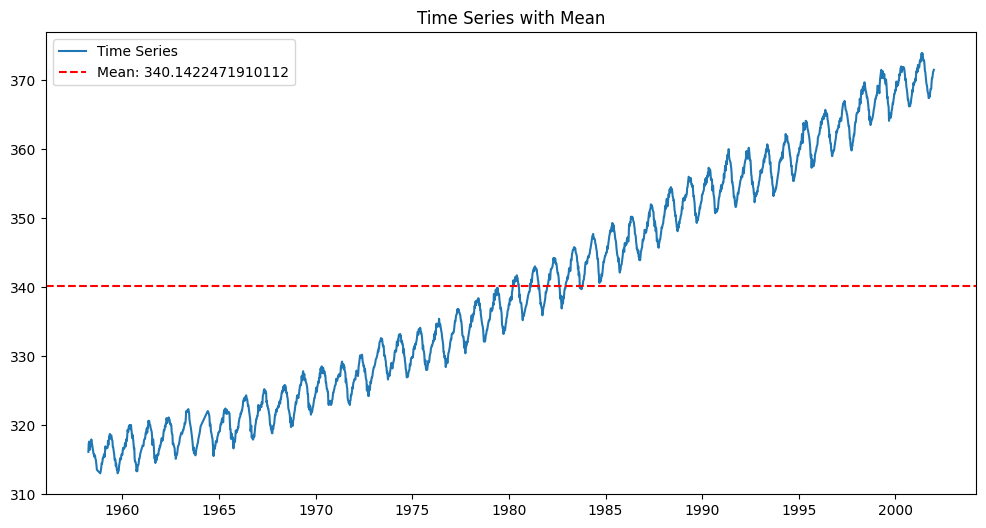

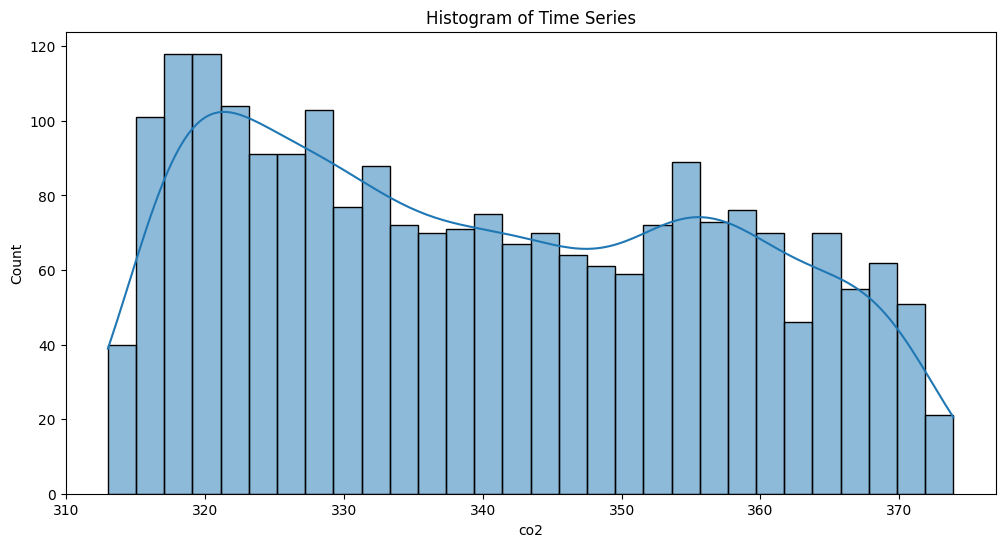

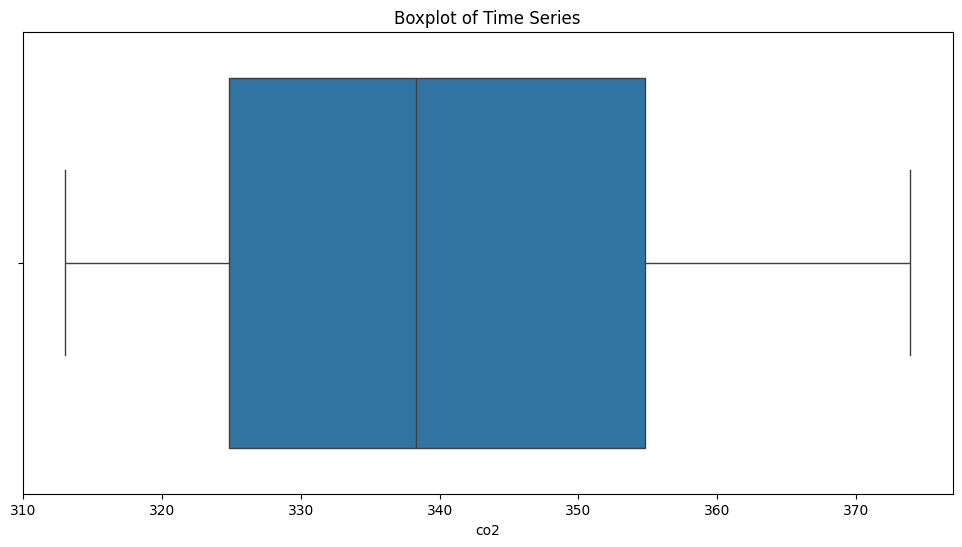

In [40]:
summarize(co2_ts)

#### 3/6 ENGEL_DF

In [41]:
ENGEL_DF.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [42]:
engel_ts = ENGEL_DF['foodexp']

In [43]:
engel_ts

0      255.839425
1      310.958667
2      485.680014
3      402.997356
4      495.560775
          ...    
230    306.519079
231    299.199328
232    468.000798
233    522.601906
234    750.320163
Name: foodexp, Length: 235, dtype: float64

Mean: 624.1501113133555
Median: 582.54125094185
Min: 242.32020192074
Max: 2032.67919020832
Autocorrelation (lag=6): [ 0.23915999  0.12156049  0.12942729 -0.00452421  0.058574    0.15134502]
Autocorrelation (lag=12): [ 0.23915999  0.12156049  0.12942729 -0.00452421  0.058574    0.15134502
  0.03900822 -0.00299799  0.21862056  0.09260307  0.10171157  0.07857251]


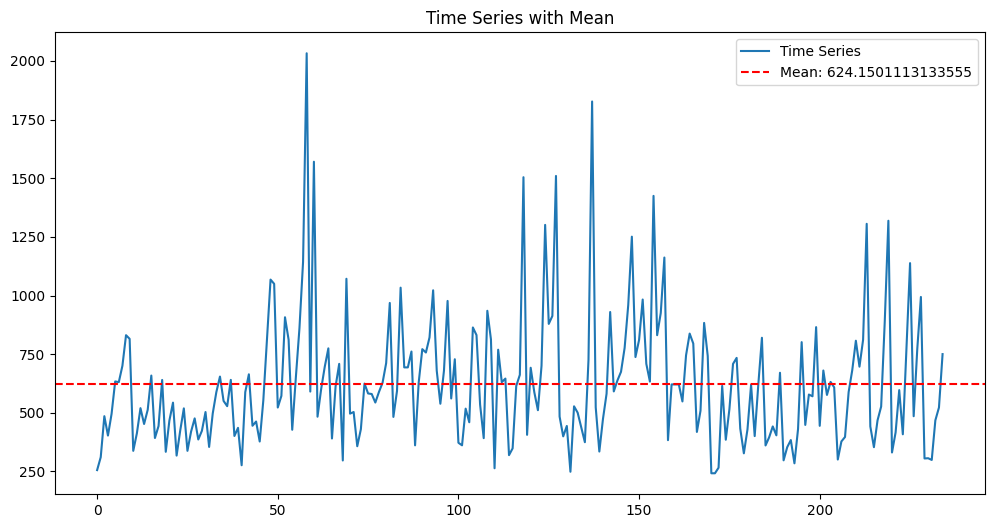

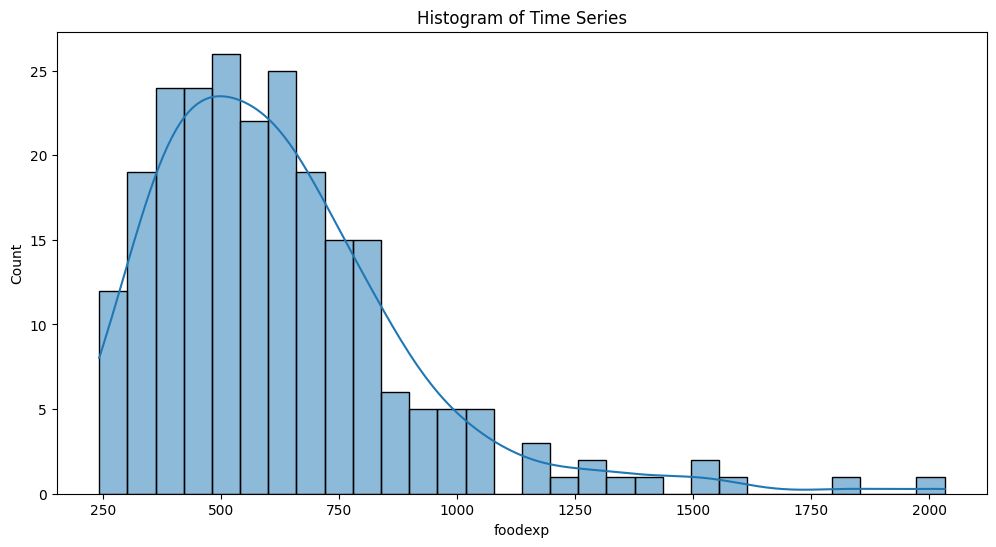

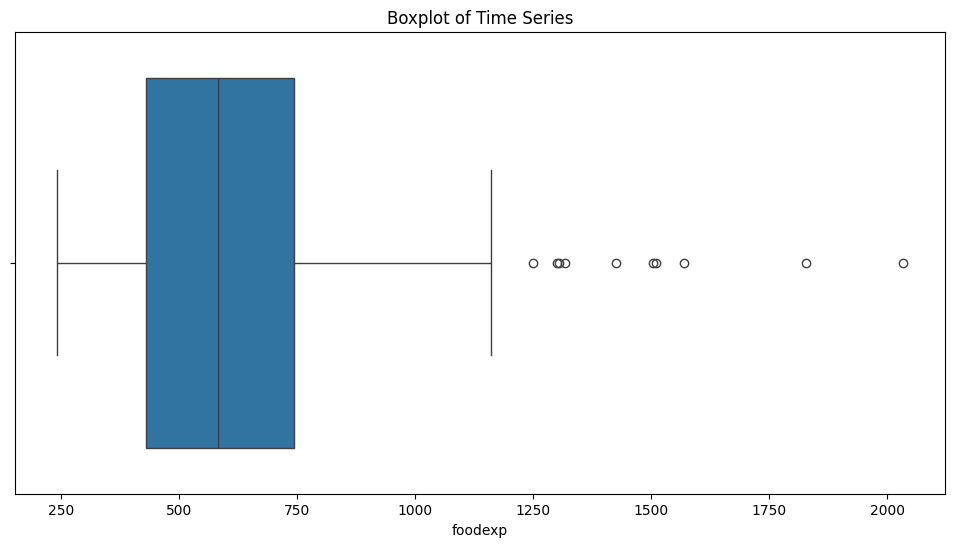

In [44]:
summarize(engel_ts)

#### 4/6 NILE_DF

In [45]:
NILE_DF.head()

,year,volume
0,1871.0,1120.0
1,1872.0,1160.0
2,1873.0,963.0
3,1874.0,1210.0
4,1875.0,1160.0


##### set year as the index

In [46]:
NILE_DF = NILE_DF.set_index('year')

In [47]:
NILE_DF.head()

,volume
year,
1871.0,1120.0
1872.0,1160.0
1873.0,963.0
1874.0,1210.0
1875.0,1160.0


In [49]:
nile_ts = NILE_DF['volume']

In [52]:
nile_ts

year
1871.0    1120.0
1872.0    1160.0
1873.0     963.0
1874.0    1210.0
1875.0    1160.0
           ...  
1966.0     746.0
1967.0     919.0
1968.0     718.0
1969.0     714.0
1970.0     740.0
Name: volume, Length: 100, dtype: float64

##### summarize

Mean: 919.35
Median: 893.5
Min: 456.0
Max: 1370.0
Autocorrelation (lag=6): [0.49840818 0.3845769  0.32786044 0.23919117 0.22842199 0.22730098]
Autocorrelation (lag=12): [0.49840818 0.3845769  0.32786044 0.23919117 0.22842199 0.22730098
 0.22204612 0.29996118 0.14173966 0.08979141 0.21547832 0.21292222]


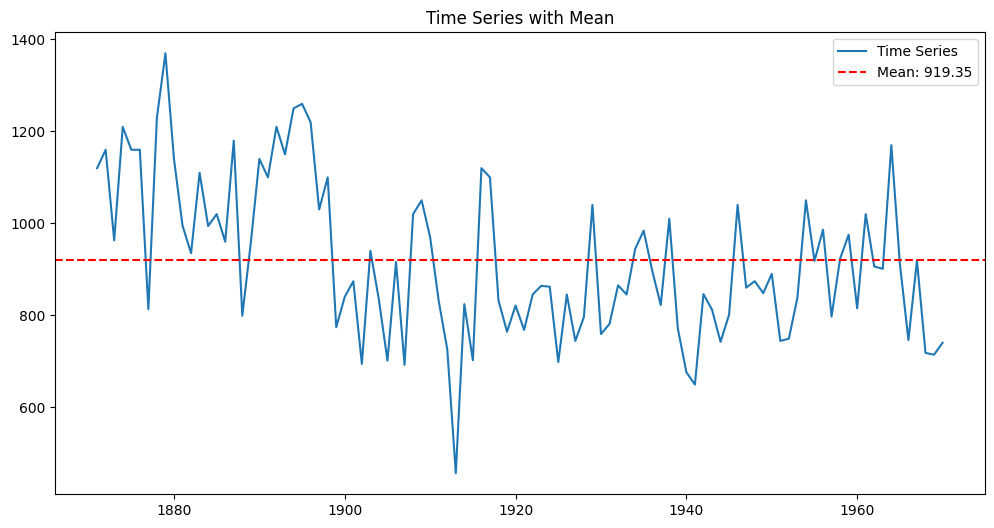

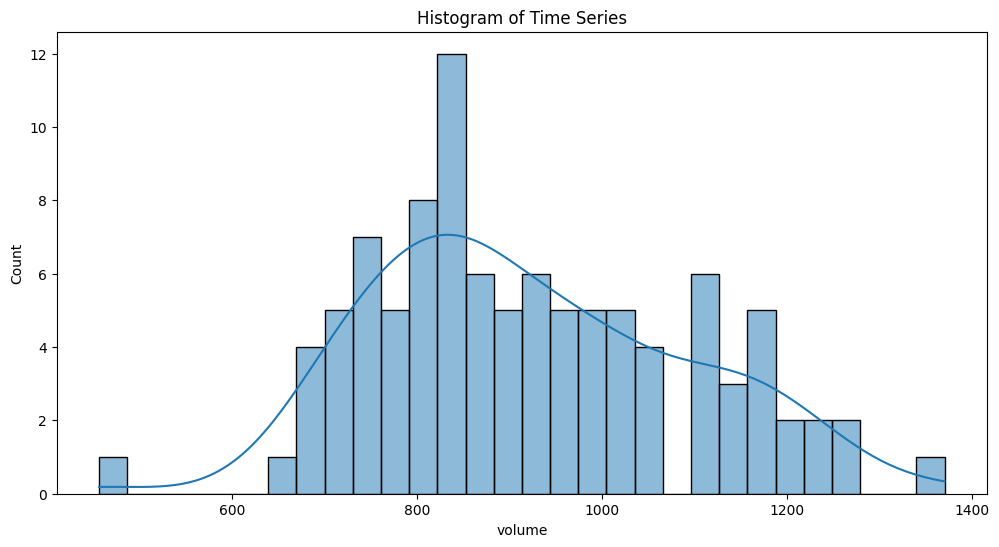

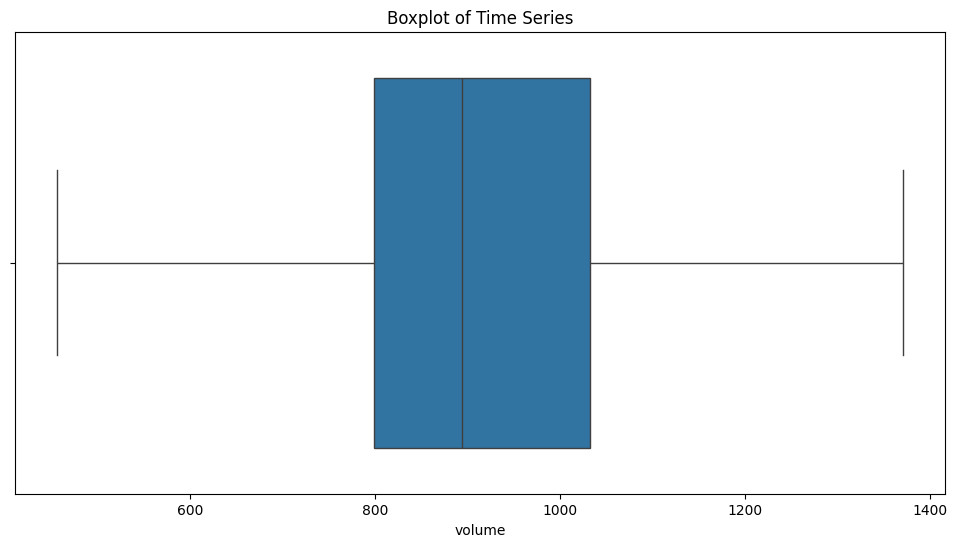

In [53]:
summarize(nile_ts)

#### 5/6 STRIKES_DF

In [54]:
STRIKES_DF.head()

,duration,iprod
0,7.0,0.01138
1,9.0,0.01138
2,13.0,0.01138
3,14.0,0.01138
4,26.0,0.01138


In [59]:
strikes_ts = STRIKES_DF['duration']

In [60]:
strikes_ts

0       7.0
1       9.0
2      13.0
3      14.0
4      26.0
      ...  
57     21.0
58     27.0
59     38.0
60     42.0
61    117.0
Name: duration, Length: 62, dtype: float64

Mean: 42.66129032258065
Median: 27.0
Min: 1.0
Max: 216.0
Autocorrelation (lag=6): [0.4458301  0.39763836 0.37031765 0.16347165 0.06370931 0.12749249]
Autocorrelation (lag=12): [ 0.4458301   0.39763836  0.37031765  0.16347165  0.06370931  0.12749249
 -0.07751972 -0.08496595 -0.09248725 -0.15626292  0.01579201 -0.14021803]


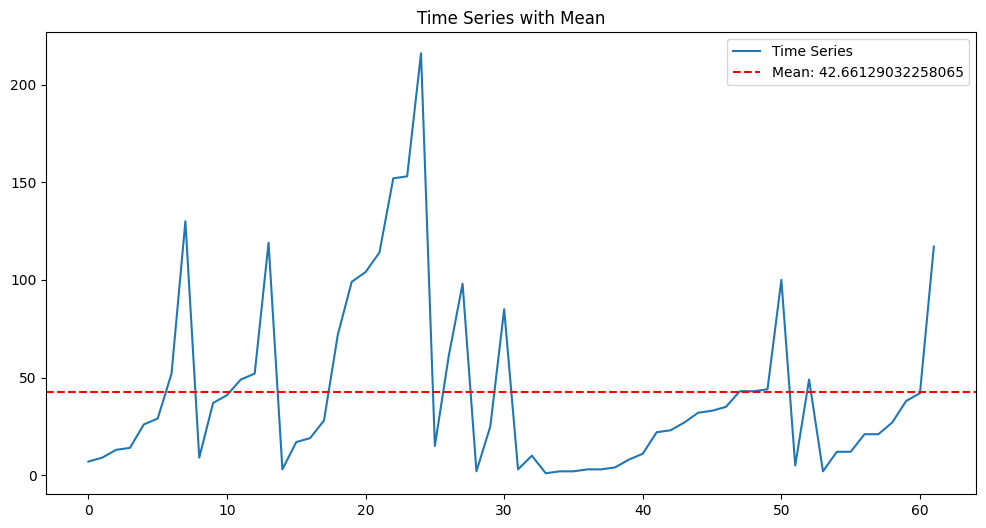

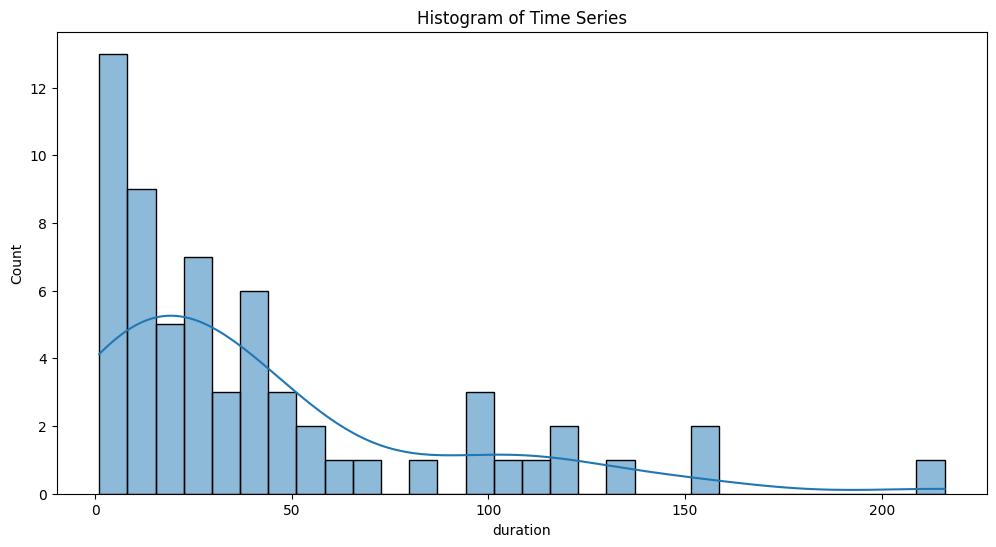

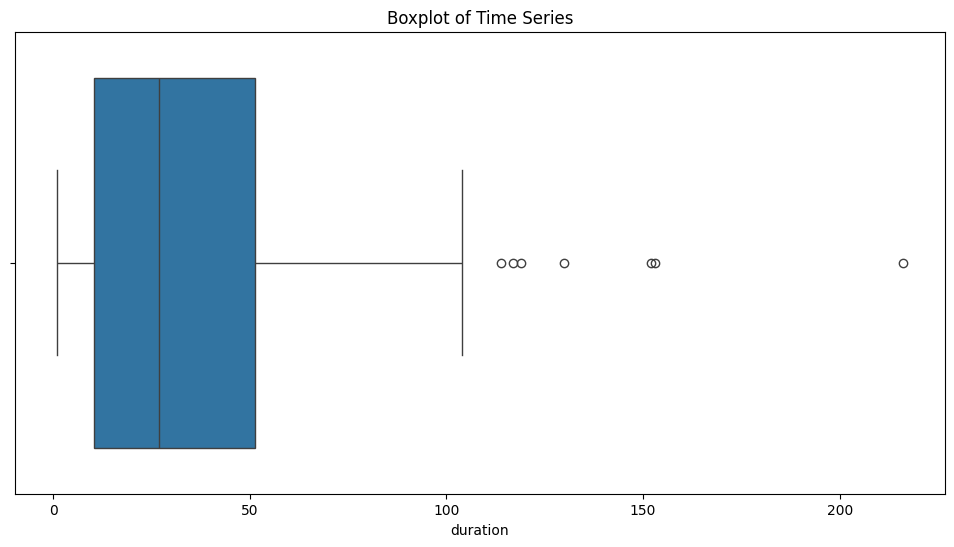

In [61]:
summarize(strikes_ts)

#### 6/6 SUNSPOTS_DF

In [63]:
SUNSPOTS_DF.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [64]:
SUNSPOTS_DF = SUNSPOTS_DF.set_index('YEAR')

In [65]:
sunspots_ts = SUNSPOTS_DF['SUNACTIVITY']

In [66]:
sunspots_ts

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Name: SUNACTIVITY, Length: 309, dtype: float64

Mean: 49.75210355987054
Median: 40.0
Min: 0.0
Max: 190.2
Autocorrelation (lag=6): [ 0.82020129  0.45126849  0.03957655 -0.27579196 -0.42523943 -0.37659509]
Autocorrelation (lag=12): [ 0.82020129  0.45126849  0.03957655 -0.27579196 -0.42523943 -0.37659509
 -0.15737391  0.15820254  0.47309753  0.65898002  0.65029082  0.45666254]


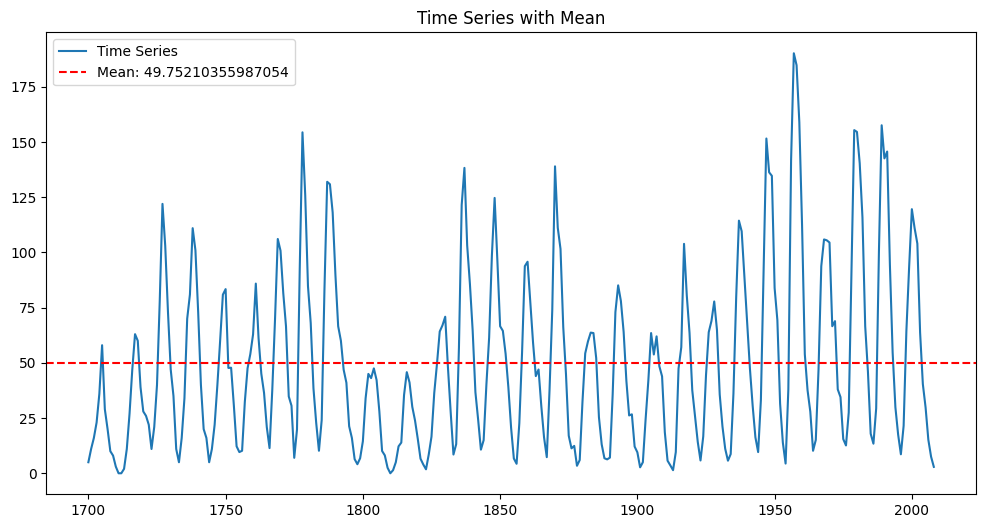

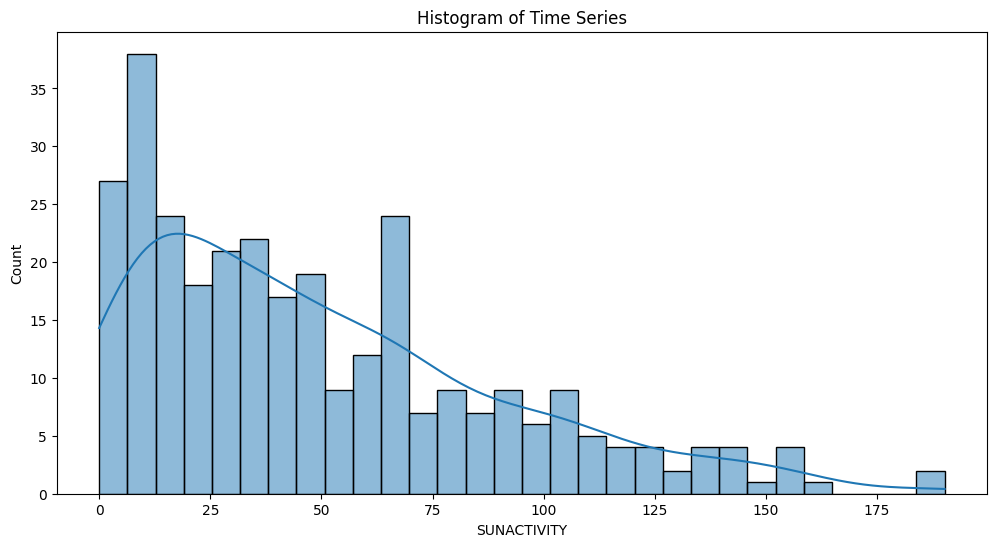

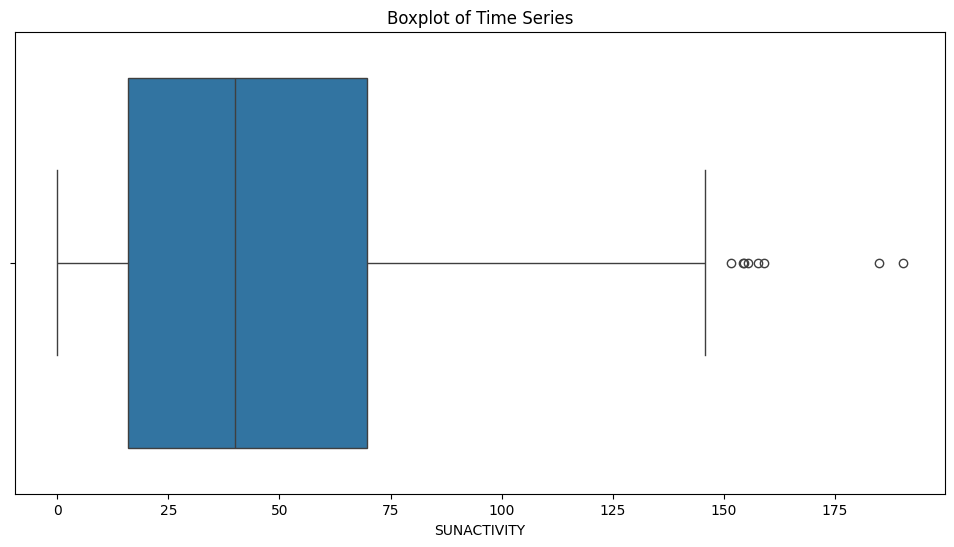

In [67]:
summarize(sunspots_ts)

### Multivariate:
> Choose 6 with more than 500 observations. Else create synthetyze the remaining ones.

In [23]:
# Multivariate datasets
